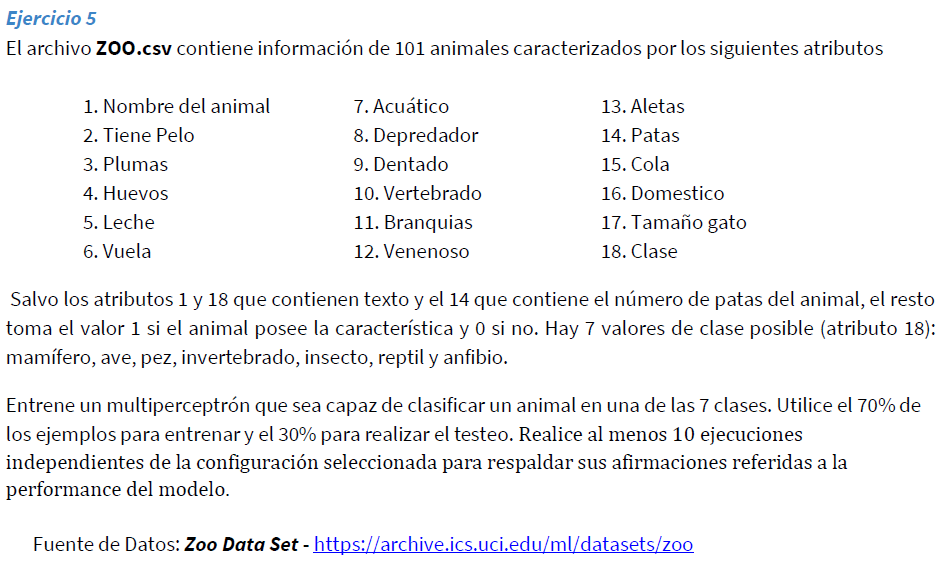

In [49]:
# configuración para notebook con instalación LOCAL
FUENTES_DIR  = '../../Datos-Fuentes/Fuentes/'     # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR    = '../../Datos-Fuentes/Datos/'      # carpeta donde se encuentran los datasets
MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

,animal,Tiene_Pelo,Tiene_Plumas,Nace_de_huevo,Toma_Leche,Vuela,Acuatico,Depredador,Dentado,Vertebrado,Respira,Venenoso,Tiene_Aletas,Cant_Patas,Tiene_Cola,Domestico,Tamano_Gato,Clase
0,oso_hormiguero,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mamifero
1,antilope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,Mamifero
2,robalo,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,Pez
3,oso,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mamifero
4,jabali,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mamifero


<Axes: >

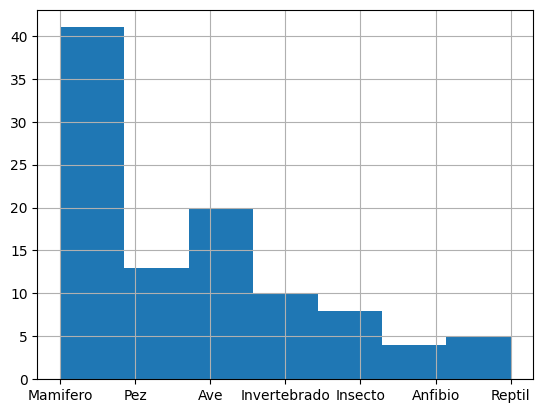

In [50]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos
import numpy as np

from sklearn import preprocessing, model_selection
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt

nombre_archivo = DATOS_DIR + 'Zoo.csv' # archivo de hojas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])

# Para hacer una inspección rápida de los datos
display(df.head())
#df.describe()
df['Clase'].hist(bins=7)


## Seleccion de atributos y target

In [51]:
# %% separa atributos y clases
X_raw = np.array(df.iloc[:,1:-1])  # recupera todas las columnas salvo la primera y la ultima(es la clase)
Y_raw = np.array(df.iloc[:,-1])    # recupera solo la ultima columna (es la clase)

# Binarizador para convertir el nombre de la clase en one hot encoding
binarizer = preprocessing.LabelBinarizer()

# Binariza cada clase como una combinación de un 1 y 0s
Y_raw = binarizer.fit_transform(Y_raw)
print('Las clases del dataset son :', binarizer.classes_)

Las clases del dataset son : ['Anfibio' 'Ave' 'Insecto' 'Invertebrado' 'Mamifero' 'Pez' 'Reptil']


## Algoritmo iterativo para ver performance de modelo

Efectividad promedio entrenamiento = 100.0
Score promedio entrenamiento = 1.0

Efectividad promedio testeo = 95.23809523809524
Score promedio testeo = 0.9350649350649352


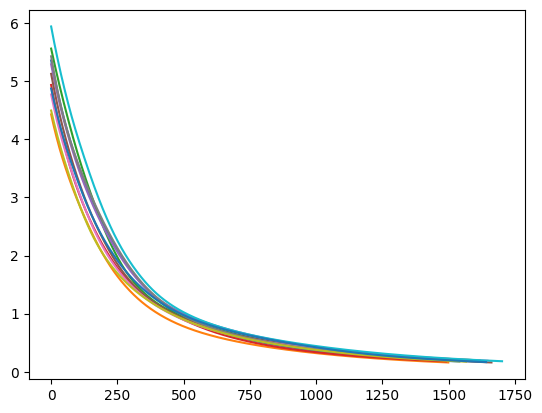

In [52]:
ITERACIONES=11
efectividad_testeo = 0
score_testeo = 0
efectividad_entrenamiento = 0
score_entrenamiento = 0

for i in range(ITERACIONES):
    #print(f"Iteracion {i}")
    # Separa ejemplos para enternamiento y testeo
    TEST_SIZE = 0.2 # proporcion entre testeo entre entrenamiento y testeo
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X_raw, Y_raw, test_size=TEST_SIZE)#, random_state=42)

    #print('\nDatos de Entrenamiento: %d   Datos de Testeo: %d' % (len(Y_train), len(Y_test) ))

    # Escala los atributos de los ejemplo
    scaler = preprocessing.StandardScaler()
    #scaler = preprocessing.MinMaxScaler()
    X_train  = scaler.fit_transform( X_train )
    X_test   = scaler.transform( X_test )


    #print("     Entrenamiento")
    FunH = 'tanh'   # identity logistic tanh relu
    ocultas = (12)

    alfa = 0.01
    MAX_ITE = 2000

    modelo = MLPClassifier(max_iter=MAX_ITE, hidden_layer_sizes=ocultas, alpha=alfa,
                        solver='adam', activation=FunH, tol=0.0002,
                        verbose=False).fit(X_train, Y_train)

    #  ########### Medición del entrenamiento ######################
    Y_pred = modelo.predict(X_train)
    score = modelo.score(X_train, Y_train)

    # "invierte" la transformacion binaria para obtener los nombres de las clases
    Y_it = binarizer.inverse_transform(Y_train)
    Y_pred_it = binarizer.inverse_transform(Y_pred)

    # calculo manual del accuracy
    #print('         Efectividad: %6.2f%%' % (100*(Y_pred_it == Y_it).sum()/len(Y_it)) )
    #print('         Score: %6.2f%%' % (score) )
    efectividad_entrenamiento+=100*(Y_pred_it == Y_it).sum()/len(Y_it)
    score_entrenamiento+=score

    plt.plot(modelo.loss_curve_)


    #print("     Testeo")
    #  ########### Medición del testeo ######################
    Y_pred = modelo.predict(X_test)
    score = modelo.score(X_test, Y_test)

    # "invierte" la transformacion binaria para obtener los nombres de las clases
    Y_it = binarizer.inverse_transform(Y_test)
    Y_pred_it = binarizer.inverse_transform(Y_pred)

    # calculo manual del accuracy
    #print('         Efectividad: %6.2f%%' % (100*(Y_pred_it == Y_it).sum()/len(Y_it)) )
    #print('         R2 Score: %6.2f%%' % (score) )
    efectividad_testeo+=100*(Y_pred_it == Y_it).sum()/len(Y_it)
    score_testeo+=score

print(f"Efectividad promedio entrenamiento = {efectividad_entrenamiento/ITERACIONES}")
print(f"Score promedio entrenamiento = {score_entrenamiento/ITERACIONES}\n")

print(f"Efectividad promedio testeo = {efectividad_testeo/ITERACIONES}")
print(f"Score promedio testeo = {score_testeo/ITERACIONES}")

## Como mejor funciona es con 12 capas internas, de 10 para abajo no suele converger